In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [3]:
train= pd.read_csv(r'C:\Users\KulkarniPa\Downloads\INeuron\PawanDataPractice\HousePricesRegressiontechniques\train.csv')
test= pd.read_csv(r'C:\Users\KulkarniPa\Downloads\INeuron\PawanDataPractice\HousePricesRegressiontechniques\test.csv')

In [5]:
Missing= pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
Missing[Missing.sum(axis=1)>0]

,train,test
MSZoning,0,4.0
LotFrontage,259,227.0
Alley,1369,1352.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtQual,37,44.0
BsmtCond,37,45.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


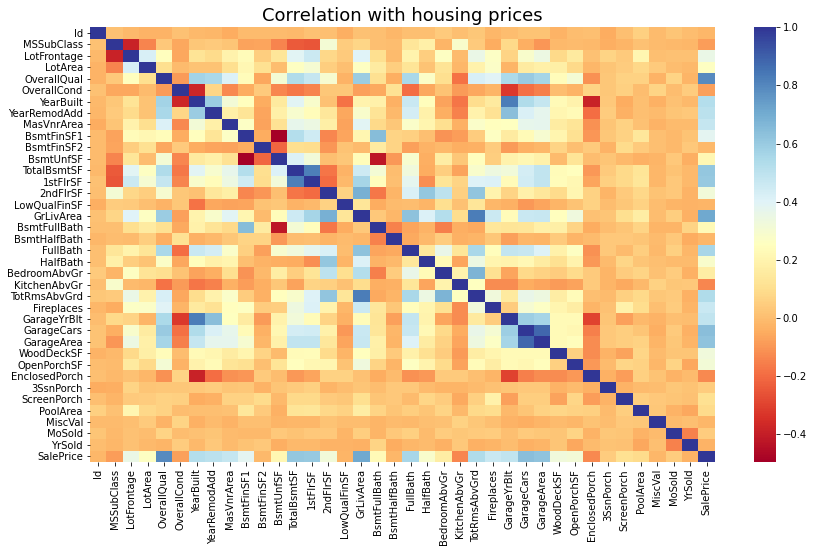

In [9]:
corr= train.corr()
plt.figure(figsize=(14,8))
plt.title('Correlation with housing prices', fontsize=18)
sns.heatmap(corr, annot=False, cmap='RdYlBu')
plt.show()

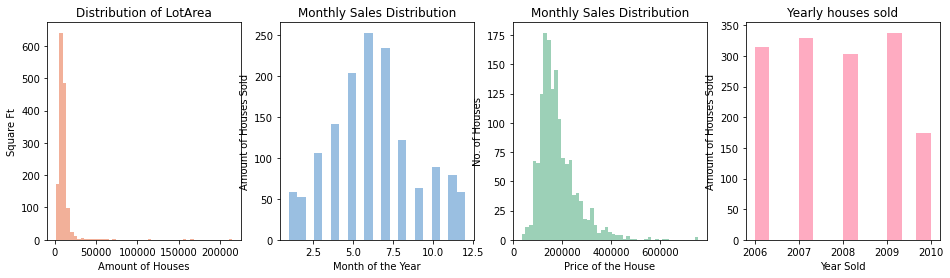

In [11]:
f, axes = plt.subplots(ncols=4, figsize=(16,4))
sns.distplot(train['LotArea'], kde=False, color="#DF3A01", ax=axes[0]).set_title("Distribution of LotArea")
axes[0].set_ylabel("Square Ft")
axes[0].set_xlabel("Amount of Houses")
sns.distplot(train['MoSold'], kde=False, color="#045FB4", ax=axes[1]).set_title("Monthly Sales Distribution")
axes[1].set_ylabel("Amount of Houses Sold")
axes[1].set_xlabel("Month of the Year")
sns.distplot(train['SalePrice'], kde=False, color="#088A4B", ax=axes[2]).set_title("Monthly Sales Distribution")
axes[2].set_ylabel("No. of Houses")
axes[2].set_xlabel("Price of the House")
sns.distplot(train['YrSold'], kde=False, color="#FE2E64", ax=axes[3]).set_title("Yearly houses sold")
axes[3].set_ylabel("Amount of Houses Sold")
axes[3].set_xlabel("Year Sold")
plt.show()

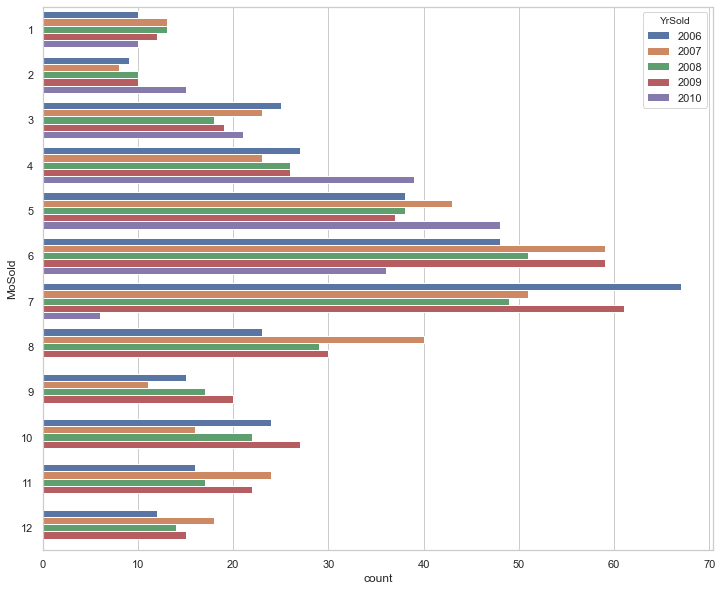

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,10))
sns.countplot(y='MoSold', hue='YrSold', data= train)
plt.show()

Text(0, 0.5, 'Price sold')

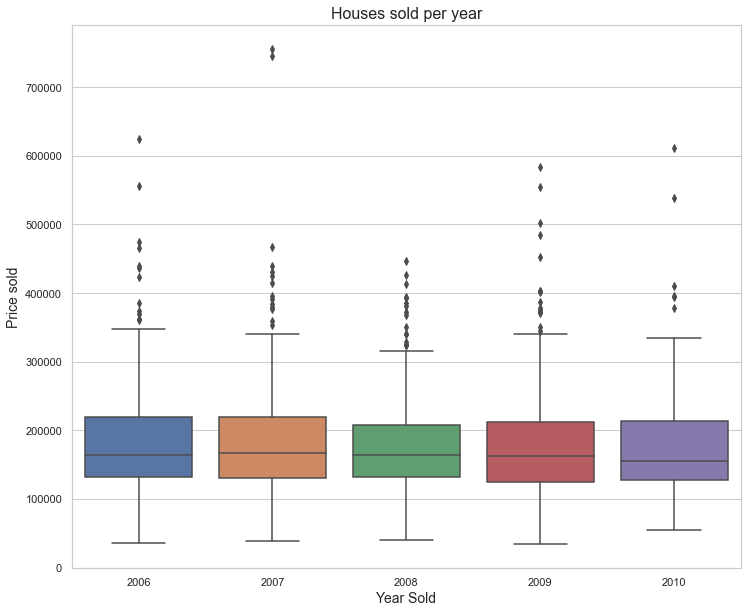

In [17]:
plt.figure(figsize=(12,10))
sns.boxplot(x='YrSold', y='SalePrice', data =train)
plt.title('Houses sold per year', fontsize=16)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)

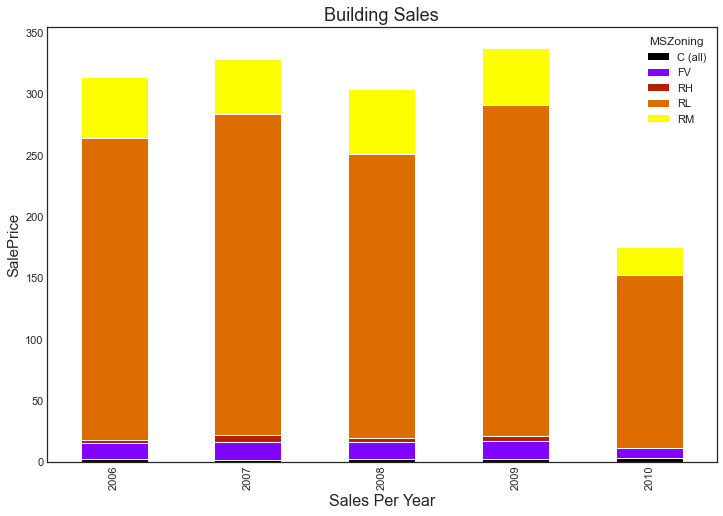

In [19]:
plt.style.use('seaborn-white')
SalesbyZone = train.groupby(['YrSold','MSZoning']).SalePrice.count()
SalesbyZone.unstack().plot(kind='bar', stacked=True, colormap='gnuplot', grid=False, figsize=(12,8))
plt.title('Building Sales', fontsize=18)
plt.xlabel('Sales Per Year', fontsize=16)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

In [20]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (1460).

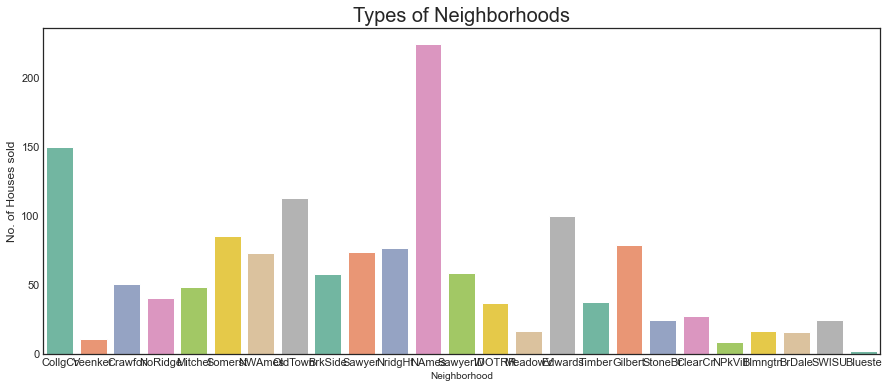

In [24]:
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(x='Neighborhood', data=train, palette='Set2')
ax.set_title('Types of Neighborhoods', fontsize=20)
ax.set_xlabel('Neighborhood', fontsize=10)
ax.set_ylabel('No. of Houses sold', fontsize=12)
ax.set_xticklabels(labels=train['Neighborhood'], rotation=90)
plt.show()

ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (1460).

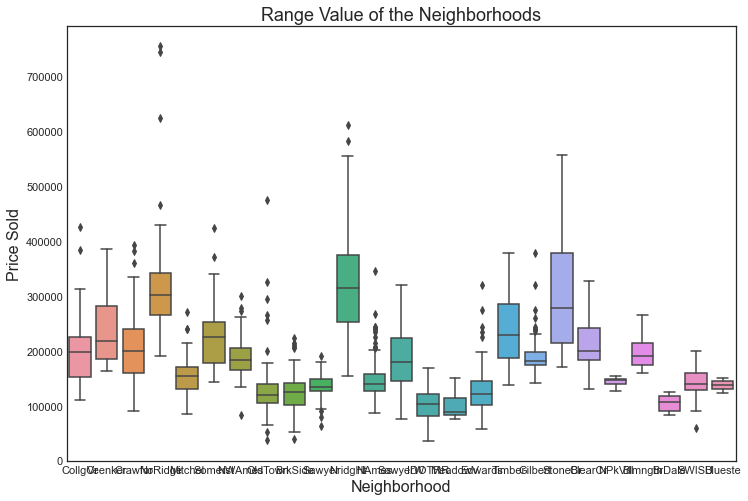

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train)
ax.set_title("Range Value of the Neighborhoods", fontsize=18)
ax.set_ylabel('Price Sold', fontsize=16)
ax.set_xlabel('Neighborhood', fontsize=16)
ax.set_xticklabels(labels=train['Neighborhood'] , rotation=90)
plt.show()

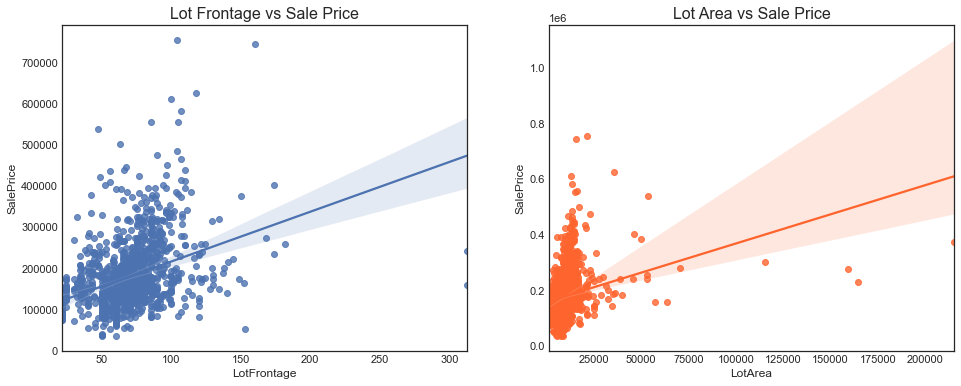

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = sns.regplot(x="LotFrontage", y="SalePrice", data=train)
ax.set_title("Lot Frontage vs Sale Price", fontsize=16)

plt.subplot(122)
ax1 = sns.regplot(x="LotArea", y="SalePrice", data=train, color='#FE642E')
ax1.set_title("Lot Area vs Sale Price", fontsize=16)

plt.show()

In [28]:
corr= train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


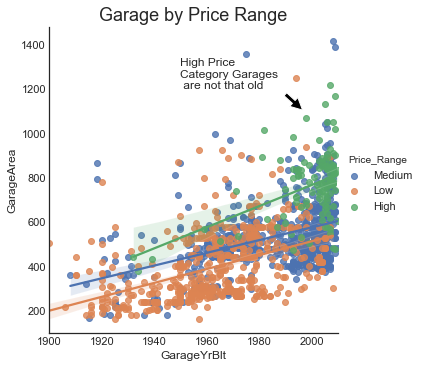

In [33]:
train['Price_Range'] = np.nan
lst = [train]

# Create a categorical variable for SalePrice
# I am doing this for further visualizations.
for column in lst:
    column.loc[column['SalePrice'] < 150000, 'Price_Range'] = 'Low'
    column.loc[(column['SalePrice'] >= 150000) & (column['SalePrice'] <= 300000), 'Price_Range'] = 'Medium'
    column.loc[column['SalePrice'] > 300000, 'Price_Range'] = 'High'
    
train.head()
import matplotlib.pyplot as plt
palette = ["#9b59b6", "#BDBDBD", "#FF8000"]
sns.lmplot('GarageYrBlt', 'GarageArea', data=train, hue='Price_Range')
plt.title('Garage by Price Range', fontsize=18)
plt.annotate('High Price \nCategory Garages \n are not that old', xy=(1997, 1100), xytext=(1950, 1200), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

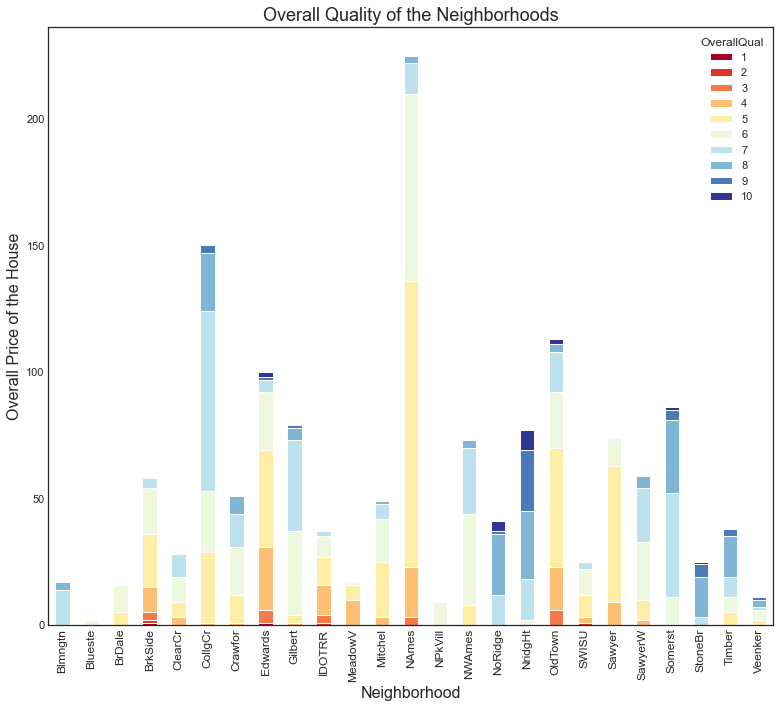

In [34]:
plt.style.use('seaborn-white')
types_foundations = train.groupby(['Neighborhood', 'OverallQual']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(13,11), grid=False)
plt.ylabel('Overall Price of the House', fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.title('Overall Quality of the Neighborhoods', fontsize=18)
plt.show()

In [35]:
numeric_features = train.dtypes[train.dtypes != "object"].index

# Top 5 most skewed features
skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


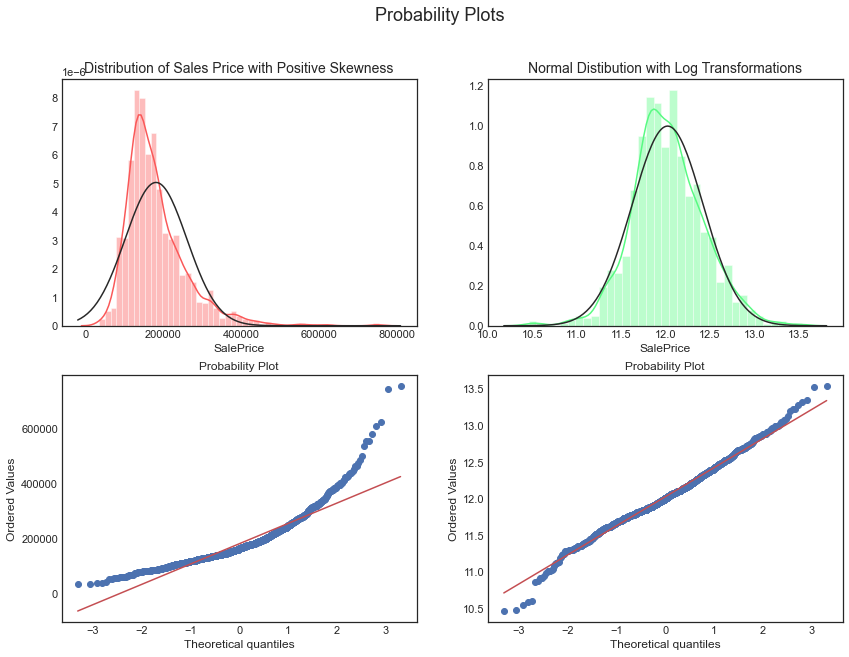

In [36]:
from scipy.stats import norm

# norm = a normal continous variable.

log_style = np.log(train['SalePrice'])  # log of salesprice

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(train['SalePrice'], color="#FA5858", ax=ax1, fit=norm)
ax1.set_title("Distribution of Sales Price with Positive Skewness", fontsize=14)
ax2 = sns.distplot(log_style, color="#58FA82",ax=ax2, fit=norm)
ax2.set_title("Normal Distibution with Log Transformations", fontsize=14)
ax3 = stats.probplot(train['SalePrice'], plot=ax3)
ax4 = stats.probplot(log_style, plot=ax4)
plt.show()

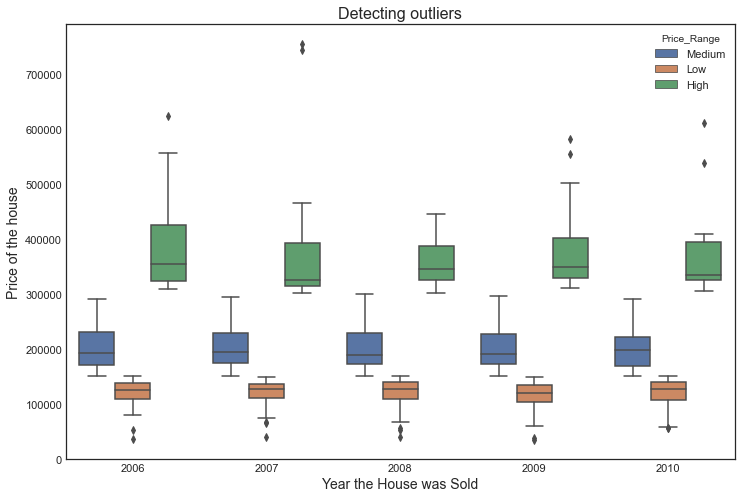

In [37]:
#Todetetc the outliers
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue='Price_Range', data=train)
plt.title('Detecting outliers', fontsize=16)
plt.xlabel('Year the House was Sold', fontsize=14)
plt.ylabel('Price of the house', fontsize=14)
plt.show()

In [38]:
#Dealin with Missing vales
y_train = train['SalePrice'].values
# We will concatenate but we will split further on.
rtrain = train.shape[0]
ntest = test.shape[0]
train.drop(['SalePrice', 'Price_Range', 'Id'], axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [39]:
complete_data = pd.concat([train, test])
complete_data.shape

(2919, 79)

In [42]:
total_nas = complete_data.isnull().sum().sort_values(ascending=False)
percent_missing = (complete_data.isnull().sum()/complete_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_nas, percent_missing], axis=1, keys=['Total_M', 'Percentage'])
print(missing)
pd.DataFrame(missing)

             Total_M  Percentage
PoolQC          2909    0.996574
MiscFeature     2814    0.964029
Alley           2721    0.932169
Fence           2348    0.804385
FireplaceQu     1420    0.486468
...              ...         ...
1stFlrSF           0    0.000000
CentralAir         0    0.000000
Heating            0    0.000000
Foundation         0    0.000000
MSSubClass         0    0.000000

[79 rows x 2 columns]


,Total_M,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
...,...,...
1stFlrSF,0,0.000000
CentralAir,0,0.000000
Heating,0,0.000000
Foundation,0,0.000000


In [44]:
complete_data["PoolQC"] = complete_data["PoolQC"].fillna("None")
complete_data["MiscFeature"] = complete_data["MiscFeature"].fillna("None")
complete_data["Alley"] = complete_data["Alley"].fillna("None")
complete_data["Fence"] = complete_data["Fence"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    complete_data[col] = complete_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    complete_data[col] = complete_data[col].fillna('None')
complete_data['MSZoning'] = complete_data['MSZoning'].fillna(complete_data['MSZoning'].mode()[0])
complete_data["MasVnrType"] = complete_data["MasVnrType"].fillna("None")
complete_data["Functional"] = complete_data["Functional"].fillna("Typ")
complete_data['Electrical'] = complete_data['Electrical'].fillna(complete_data['Electrical'].mode()[0])
complete_data['KitchenQual'] = complete_data['KitchenQual'].fillna(complete_data['KitchenQual'].mode()[0])
complete_data['Exterior1st'] = complete_data['Exterior1st'].fillna(complete_data['Exterior1st'].mode()[0])
complete_data['Exterior2nd'] = complete_data['Exterior2nd'].fillna(complete_data['Exterior2nd'].mode()[0])
complete_data['SaleType'] = complete_data['SaleType'].fillna(complete_data['SaleType'].mode()[0])
complete_data['MSSubClass'] = complete_data['MSSubClass'].fillna("None")

In [43]:
complete_data["LotFrontage"] = complete_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    complete_data[col] = complete_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    complete_data[col] = complete_data[col].fillna(0)
    
complete_data["MasVnrArea"] = complete_data["MasVnrArea"].fillna(0)

In [45]:
complete_data = complete_data.drop(['Utilities'], axis=1)

In [46]:
complete_data['TotalSF'] =  complete_data['TotalBsmtSF']+complete_data['1stFlrSF']+complete_data['2ndFlrSF']

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

In [49]:
numerical = complete_data.select_dtypes(exclude=['object'])
numerical.columns.get_loc("TotalBsmtSF")
numerical.columns.get_loc("1stFlrSF")
numerical.columns.get_loc("2ndFlrSF")

13

In [72]:
ix_total, ix_first, ix_second = 9, 10, 11
class CombineAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, total_area=True):
        self.total_area=total_area
    def fit(self,X, y=None):
        return self
    def transform(self, X, y=None):
        total_sf = X[:,ix_total] + X[:,ix_first] + X[:,ix_second]
        if self.total_area:
            return np.c_[X, total_sf]
        else: 
            return np.c_[X]
attr_adder = CombineAttributes(total_area=True)
extra_attribs = attr_adder.transform(complete_data.values)
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
    def fit(self, X, y=None):
if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
        template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
        raise ValueError(template % self.handle_unknown)
if self.handle_unknown not in ['error', 'ignore']:
        template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
        raise ValueError(template % self.handle_unknown)
if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
        raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self
def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
        X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
        X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

IndentationError: expected an indented block (<ipython-input-72-d8da0e1b9872>, line 30)

In [73]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lst_numerical = list(numerical)

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(lst_numerical)),
    ('extra attributes', CombineAttributes()),
    ('std_scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
                                    'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle',
                                    'RoofMatl', 'Exterior1st',  'Exterior2nd','ExterQual','ExterCond', 'Foundation',
                                    'Heating','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                                    'PavedDrive', 'SaleType', 'SaleCondition'])),
    ('encoder', CategoricalEncoder(encoding="onehot-dense")),
])


In [75]:
from sklearn.pipeline import FeatureUnion

main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numeric_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

data_prepared = main_pipeline.fit_transform(complete_data)
data_prepared

array([[ 0.06733141, -0.20935903, -0.21787869, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87361603,  0.48189993, -0.07204408, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06733141, -0.07110724,  0.13719688, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87361603,  4.16861441,  1.24680804, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65542357, -0.34761082,  0.0346054 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06733141,  0.20539635, -0.06862014, ...,  0.        ,
         1.        ,  0.        ]])

In [76]:
features = data_prepared
labels = np.log1p(y_train) # Scaling the Saleprice column.

train_scaled = features[:rtrain] 
test_scaled = features[rtrain:]

In [78]:
#predictive models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import Ridge

In [79]:
X_train, X_val, y_train, y_val = train_test_split(train_scaled, labels, test_size=0.25, random_state=42)

In [80]:
n_folds = 5

def rmsle_cv(model, features, labels):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(features) # Shuffle the data.
    rmse= np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse.mean())

In [81]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': list(range(50, 200, 25)), 'max_features': ['auto', 'sqrt', 'log2'], 
         'min_samples_leaf': list(range(50, 200, 50))}

grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [50, 100, 150],
                         'n_estimators': [50, 75, 100, 125, 150, 175]})

In [82]:
grid_search_cv.best_estimator_

RandomForestRegressor(min_samples_leaf=50, n_estimators=150, random_state=42)

In [83]:
grid_search_cv.cv_results_
df_results = pd.DataFrame(grid_search_cv.cv_results_)
df_results.sort_values(by='mean_test_score', ascending=True).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
53,0.673622,0.042371,0.038899,0.004197,log2,150,175,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.344979,0.377781,0.300617,0.365000,0.391699,0.356015,0.031682,54
52,0.687533,0.017939,0.041586,0.010406,log2,150,150,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.357261,0.390901,0.307982,0.376932,0.406339,0.367883,0.034034,53


In [84]:
rand_model = grid_search_cv.best_estimator_

rand_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=50, n_estimators=150, random_state=42)

In [85]:
y_pred = rand_model.predict(X_val)
rand_mse = mean_squared_error(y_val, y_pred)
rand_rmse = np.sqrt(rand_mse)
rand_rmse

0.18201162107511729

In [86]:
score = rmsle_cv(rand_model, X_val, y_val)
print("Random Forest score: {:.4f}\n".format(score))

Random Forest score: 0.2458



In [87]:
params = {'learning_rate': [0.05], 'loss': ['huber'], 'max_depth': [2], 'max_features': ['log2'], 'min_samples_leaf': [14], 
          'min_samples_split': [10], 'n_estimators': [3000]}


grad_boost = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=2, 
                                       max_features='log2', min_samples_leaf=14, min_samples_split=10, n_estimators=3000,
                                       random_state=42)


grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=2,
                          max_features='log2', min_samples_leaf=14,
                          min_samples_split=10, n_estimators=3000,
                          random_state=42)

In [88]:
y_pred = grad_boost.predict(X_val)
gboost_mse = mean_squared_error(y_val, y_pred)
gboost_rmse = np.sqrt(gboost_mse)
gboost_rmse

0.12245585881513908

In [89]:
score = rmsle_cv(grad_boost, X_val, y_val)
print("Gradient Boosting score: {:.4f}\n".format(score))

Gradient Boosting score: 0.1401



In [90]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

In [91]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=3000)
svr = SVR(C=1, kernel='linear')
tree_reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=None, min_samples_split=3)
ridge_reg = Ridge(alpha=10)


In [92]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
# Try tomorrow with svr_rbf = SVR(kernel='rbf')
# Check this website!
# Consider adding two more models if the score does not improve.
lin_reg = LinearRegression()

ensemble_model = StackingRegressor(regressors=[elastic_net, svr, rand_model, grad_boost], meta_regressor=SVR(kernel="rbf"))

ensemble_model.fit(X_train, y_train)


score = rmsle_cv(ensemble_model, X_val, y_val)
print("Stacking Regressor score: {:.4f}\n".format(score))

Stacking Regressor score: 0.1514



In [93]:
final_pred = ensemble_model.predict(test_scaled)

In [95]:
final = pd.DataFrame()

# Id and Predictions
final['SalePrice'] = np.expm1(final_pred)

# CSV file
final.to_csv('submission.csv', index=False) # Create Submission File
print('The File has been Submitted!')

The File has been Submitted!
